# **Klasifikasi Performa Tubuh dengan Metode Backpropagation**
### **Proyek Akhir Jaringan Saraf Tiruan**
---
**Kelompok 3:**
- Amira Ghina Nurfansepta (215150201111026)
- Fathia Amaliah (215150201111018)
- Ruri Desfianti (215150207111027)
- Safir Magenta Putri Bastomi (215150201111021)

## **Dataset Kaggle ([Body Performance Data](https://www.kaggle.com/datasets/kukuroo3/body-performance-data))**
Dataset tersebut berisi data yang mengonfirmasi tingkat performa tubuh dengan beberapa data performa latihan. Stratified subsampling sudah dilakukan pada dataset yang awalnya berisi 13393 baris sehingga menjadi 400 baris.

## **Data Understanding**
Data Understanding merupakan tahap awal dari proses Data Science. Tujuan dari tahap ini adalah mengumpulkan informasi tentang data yang akan dianalisis. Pada tahap ini, data akan dideskripsikan, dilakukan statistika deskriptif, dan diuji kualitasnya untuk eksplorasi data sehingga dapat mengungkapkan pola dan hubungan yang menarik.

### **Import Library**
Library adalah kumpulan kode yang sudah ditulis dan dapat digunakan kembali untuk membantu mempercepat pengembangan program.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import time
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Beberapa library digunakan dalam mengerjakan tugas ini. Library tersebut memiliki fungsinya masing-masing. Berikut adalah penjelasan fungsi dari setiap library-nya.
- Library google digunakan untuk melakukan import dataset melalui Google Drive sehingga proses dapat dilakukan dengan mudah.
- Library pandas digunakan untuk mengolah dataframe.
- Library numpy digunakan untuk mendukung proses modelling.
- Library matplotlib dan seaborn digunakan untuk melakukan visualisasi data.
- Library warnings digunakan untuk mengabaikan pesan warning supaya hasil tampilan kode lebih baik.

Tugas ini dibuat dari scratch sehingga tidak ada library machine learning. Library scikit-learn hanya digunakan untuk split data dan evaluasi.

### **Import Dataset**
Dataset Body Performance Data di-import untuk diproses.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/JST/body-performance-data.csv')
df.columns = ['age', 'gender', 'height_cm', 'weight_kg', 'body_fat_%', 'diastolic', 'systolic', 'grip_force', 'sit_and_bend_forward_cm',
              'sit_ups_counts', 'broad_jump_cm', 'class']
df.head()

,age,gender,height_cm,weight_kg,body_fat_%,diastolic,systolic,grip_force,sit_and_bend_forward_cm,sit_ups_counts,broad_jump_cm,class
0,23.0,F,173.0,80.7,34.8,91.0,130.0,35.8,20.7,35.0,192.0,B
1,24.0,M,165.4,68.0,11.0,75.0,120.0,51.4,16.9,58.0,240.0,A
2,37.0,M,174.5,79.0,20.8,80.0,129.0,51.9,22.0,55.0,234.0,A
3,64.0,F,153.2,51.3,33.0,70.0,139.0,19.0,18.2,10.0,108.0,C
4,38.0,F,162.1,64.1,20.8,80.0,148.0,30.0,17.8,41.0,210.0,B


Pada awalnya, judul kolom tidak konsisten sehingga diperlukan perbaikan agar memudahkan proses selanjutnya. Dataset berisi gender dan class yang masih bertipe kategorikal sehingga perlu dilakukan encoding agar dapat dilakukan modelling.

### **Dataset Information**
Segala informasi mengenai dataset dicari untuk lebih memahami dataset.

In [ ]:
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])

Jumlah baris: 400
Jumlah kolom: 12


Dataset terdiri dari 400 baris dan 12 kolom.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   gender                   400 non-null    object 
 2   height_cm                400 non-null    float64
 3   weight_kg                400 non-null    float64
 4   body_fat_%               400 non-null    float64
 5   diastolic                400 non-null    float64
 6   systolic                 400 non-null    float64
 7   grip_force               400 non-null    float64
 8   sit_and_bend_forward_cm  400 non-null    float64
 9   sit_ups_counts           400 non-null    float64
 10  broad_jump_cm            400 non-null    float64
 11  class                    400 non-null    object 
dtypes: float64(10), object(2)
memory usage: 37.6+ KB


Dataset terdiri dari 12 kolom dengan tipe yang berbeda-beda. Terdapat 10 kolom yang bertipe float atau numerikal dan 2 kolom yang bertipe object atau kategorikal.

In [ ]:
df.describe(include='all')

,age,gender,height_cm,weight_kg,body_fat_%,diastolic,systolic,grip_force,sit_and_bend_forward_cm,sit_ups_counts,broad_jump_cm,class
count,400.000000,400,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
freq,NaN,250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,36.907500,NaN,167.805000,66.202200,22.775607,79.472500,130.927500,36.555250,15.328150,39.410000,189.640000,NaN
std,13.773097,NaN,8.155385,11.969981,7.070115,10.251438,14.663211,10.218852,7.780245,14.435125,37.995388,NaN
min,21.000000,NaN,146.300000,42.200000,6.000000,51.000000,98.000000,5.300000,-18.400000,0.000000,76.000000,NaN
25%,25.000000,NaN,161.600000,56.200000,17.775000,72.000000,120.000000,27.875000,10.600000,31.000000,161.750000,NaN
50%,32.000000,NaN,169.100000,66.160000,21.950000,79.000000,130.500000,36.700000,16.400000,41.500000,191.500000,NaN
75%,50.000000,NaN,173.725000,74.140000,27.300000,87.000000,142.000000,43.925000,20.800000,50.000000,220.000000,NaN


- Statistika deskriptif, seperti jumlah, rata-rata, standar deviasi, dan lain sebagainya dicari untuk kolom numerikal.
- Statistika deskriptif, seperti jumlah, jumlah data unik, dan lain sebagainya dicari untuk kolom kategorikal.

In [ ]:
print("Jumlah data duplikasi:", df.duplicated().sum())

Jumlah data duplikasi: 0


Dataset tidak memiliki baris yang terduplikasi.

In [ ]:
df.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body_fat_%                 0
diastolic                  0
systolic                   0
grip_force                 0
sit_and_bend_forward_cm    0
sit_ups_counts             0
broad_jump_cm              0
class                      0
dtype: int64

Dataset tidak memiliki missing value di setiap kolomnya.

## **Data Preprocessing**
Data preprocessing adalah tahap berikutnya dalam proses Data Science. Pada tahap ini, data akan diubah, data yang hilang diisi, data disederhanakan, data disamakan, dan lain sebagainya. Tujuan akhir dari tahap ini adalah untuk mengubah data menjadi sebuah bentuk yang dapat dianalisis dengan mudah.

### **Label Encoding**
Label Encoding adalah proses transformasi data kategorikal atau nominal menjadi data numerikal dengan cara memberikan label atau angka untuk setiap kategori pada suatu fitur atau kolom. Tujuan dari label encoding adalah untuk mengubah variabel kategorikal menjadi variabel numerikal sehingga dapat diolah oleh algoritma machine learning yang hanya dapat mengoperasikan data dalam bentuk numerikal.

In [ ]:
df_encoding = df.copy()
df_encoding['gender'] = df_encoding['gender'].replace({'M':0, 'F':1})
df_encoding['class'] = df_encoding['class'].replace({'A':0, 'B':1, 'C':2, 'D':3})
df_encoding.head()

,age,gender,height_cm,weight_kg,body_fat_%,diastolic,systolic,grip_force,sit_and_bend_forward_cm,sit_ups_counts,broad_jump_cm,class
0,23.0,1,173.0,80.7,34.8,91.0,130.0,35.8,20.7,35.0,192.0,1
1,24.0,0,165.4,68.0,11.0,75.0,120.0,51.4,16.9,58.0,240.0,0
2,37.0,0,174.5,79.0,20.8,80.0,129.0,51.9,22.0,55.0,234.0,0
3,64.0,1,153.2,51.3,33.0,70.0,139.0,19.0,18.2,10.0,108.0,2
4,38.0,1,162.1,64.1,20.8,80.0,148.0,30.0,17.8,41.0,210.0,1


Pada kolom gender, nilai M atau Male diganti menjadi 0 dan nilai F atau Female diganti menjadi 1. Selain itu, pada kolom class, kelas A diganti menjadi 0 , kelas B diganti menjadi 1, kelas C diganti menjadi 2, dan kelas D diganti menjadi 3.

### **One-hot Encoding**
One-hot encoding adalah metode representasi variabel kategorikal sebagai vektor biner dengan nilai 1 pada kelas yang sesuai dan nilai 0 pada kelas lainnya. Teknik ini mempermudah model pembelajaran mesin untuk mengolah data kategorikal.

In [ ]:
import numpy as np

def onehot_enc(lbl, min_val=0):
  mi = min(lbl)
  enc = np.full((len(lbl), max(lbl) - mi + 1), min_val, np.int8)
  for i, x in enumerate(lbl):
    enc[i, x - mi] = 1
  return enc

def onehot_dec(enc, mi=0):
  return [np.argmax(e) + mi for e in enc]

Fungsi ini digunakan untuk mengubah fitur target.

### **Removing Outlier**
Menghilangkan outlier dengan metode Interquartile Range (IQR) melibatkan penentuan batas atas dan batas bawah berdasarkan perbedaan antara kuartil ketiga dan kuartil pertama, kemudian menghapus nilai yang berada di luar batas tersebut untuk membersihkan dataset dari nilai-nilai yang dianggap ekstrem.

In [ ]:
# def remove_outliers_iqr(df_input):
#     df_in = df_input.copy()
#     list_fitur = df_input.columns[:-1]
#     for fitur in list_fitur:
#         Q1 = np.percentile(df_input[fitur], 25)
#         Q3 = np.percentile(df_input[fitur], 75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         outliers = (df_input[fitur] < lower_bound) | (df_input[fitur] > upper_bound)
#         df_in[fitur][outliers] = np.nan

#     df_in = df_in.dropna()
#     return df_in

# df_encoding = remove_outliers_iqr(df_encoding)
# df_encoding.head()

Akurasi yang didapatkan setelah menghilangkan outlier malah turun. Hal tersebut mungkin terjadi karena ukuran dataset yang kecil sehingga mengurangi informasi.

### **Normalization**
Normalisasi adalah proses mengubah variabel numerikal dalam suatu dataset sehingga nilainya memiliki skala yang sama atau proporsional. Tujuannya adalah untuk menghilangkan bias atau efek dari skala yang berbeda-beda pada analisis data dan memastikan bahwa setiap variabel memiliki kontribusi yang seimbang dalam model atau analisis yang dilakukan.

In [ ]:
def cetak_rentang(df_input):
  df_in = df_input.copy()
  list_fitur = df_in.columns[:-1]
  for fitur in list_fitur:
    max = df_in[fitur].max()
    min = df_in[fitur].min()
    print("Rentang fitur", fitur, "adalah", max - min)

cetak_rentang(df_encoding)

Rentang fitur age adalah 43.0
Rentang fitur gender adalah 1
Rentang fitur height_cm adalah 41.39999999999998
Rentang fitur weight_kg adalah 65.7
Rentang fitur body_fat_% adalah 37.7
Rentang fitur diastolic adalah 48.0
Rentang fitur systolic adalah 62.0
Rentang fitur grip_force adalah 56.800000000000004
Rentang fitur sit_and_bend_forward_cm adalah 52.9
Rentang fitur sit_ups_counts adalah 70.0
Rentang fitur broad_jump_cm adalah 199.0


Sebelum dilakukan normalisasi, cek terlebih dahulu rentang (nilai max - nilai min) pada masing-masing fitur. Dapat dilihat bahwa rentang pada fitur gender berbeda cukup jauh dibanding fitur lainnya.

In [ ]:
def minmax(df_input):
  df_in = df_input.copy()
  list_fitur = df_in.columns[:-1]
  for fitur in list_fitur:
    max = df_in[fitur].max()
    min = df_in[fitur].min()
    df_in[fitur] = (df_in[fitur] - min) / (max - min)
  return df_in

df_norm = minmax(df_encoding)
df_norm.head()

,age,gender,height_cm,weight_kg,body_fat_%,diastolic,systolic,grip_force,sit_and_bend_forward_cm,sit_ups_counts,broad_jump_cm,class
0,0.046512,1.0,0.644928,0.585997,0.763926,0.833333,0.516129,0.536972,0.739130,0.500000,0.582915,1
1,0.069767,0.0,0.461353,0.392694,0.132626,0.500000,0.354839,0.811620,0.667297,0.828571,0.824121,0
2,0.372093,0.0,0.681159,0.560122,0.392573,0.604167,0.500000,0.820423,0.763705,0.785714,0.793970,0
3,1.000000,1.0,0.166667,0.138508,0.716180,0.395833,0.661290,0.241197,0.691871,0.142857,0.160804,2
4,0.395349,1.0,0.381643,0.333333,0.392573,0.604167,0.806452,0.434859,0.684310,0.585714,0.673367,1


Normalisasi min-max adalah salah satu teknik normalisasi data yang paling umum digunakan. Tujuan dari normalisasi ini adalah untuk mengubah data dalam rentang nilai tertentu. Normalisasi Min-Max dilakukan dengan mengubah nilai-nilai data ke dalam rentang [0, 1], atau rentang lain yang diinginkan. Berikut adalah rumus untuk normalisasi min-max.

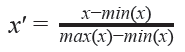

In [ ]:
cetak_rentang(df_norm)

Rentang fitur age adalah 1.0
Rentang fitur gender adalah 1.0
Rentang fitur height_cm adalah 1.0
Rentang fitur weight_kg adalah 1.0
Rentang fitur body_fat_% adalah 1.0
Rentang fitur diastolic adalah 1.0
Rentang fitur systolic adalah 1.0
Rentang fitur grip_force adalah 1.0
Rentang fitur sit_and_bend_forward_cm adalah 1.0
Rentang fitur sit_ups_counts adalah 1.0
Rentang fitur broad_jump_cm adalah 1.0


Sesudah dilakukan normalisasi, rentang untuk semua fitur adalah 1. Hal itu berarti data sudah normal.

## **Split Data**

In [ ]:
X = df_norm.drop(['class'], axis=1).to_numpy()
y = onehot_enc(df_norm['class'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=0)
print("Jumlah data train:", len(y_train))
print("Jumlah data test:", len(y_test))

Jumlah data train: 320
Jumlah data test: 80


### **Feature Selection**
Feature selection adalah proses pemilihan subset fitur yang paling relevan dari dataset untuk meningkatkan kinerja model dan mengurangi kompleksitas, dengan tujuan meningkatkan akurasi prediksi atau menghemat sumber daya komputasi. Hal ini dapat dilakukan dengan berbagai metode, termasuk pemilihan berdasarkan statistik univariat, model-based, dan teknik-teknik lain yang mengidentifikasi fitur-fitur yang paling informatif.

**Correlation Matrix**

Setelah melakukan feature selection berdasarkan correlation matrix secara manual, hasil yang didapatkan malah menurunkan akurasi dibandingkan dengan memakai keseluruhan fitur.

**KBest**

Feature selection dengan SelectKBest adalah teknik yang menggunakan uji statistik univariat untuk memilih K fitur terbaik dari dataset, di mana fitur-fitur tersebut memiliki dampak paling signifikan terhadap variabel target, membantu memperbaiki kinerja model dan mengurangi dimensi data. Proses ini membantu meningkatkan efisiensi komputasi dan dapat menghasilkan model yang lebih mudah diinterpretasikan.

In [ ]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif

# X = df_norm.drop(['class'], axis=1)
# y = df_norm['class']

# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     train_size=0.8,
#                                                     test_size=0.2,
#                                                     random_state=0)

# k_best = SelectKBest(score_func=f_classif, k=5)

# X_train = k_best.fit_transform(X_train, y_train)
# X_test = k_best.transform(X_test)

# y_train = onehot_enc(y_train)
# y_test = onehot_enc(y_test)

Hasil yang didapatkan dengan KBest tidak lebih baik dari penggunaan seluruh fitur.

**PCA**

Feature selection dengan PCA melibatkan proyeksi data ke dalam ruang fitur yang lebih rendah dengan mempertahankan varian terbesar, menghasilkan subset fitur yang merepresentasikan sebagian besar informasi dari dataset asli. Proses ini membantu mengurangi dimensi data dengan mempertahankan sebagian besar variasi, mendukung efisiensi komputasi, dan memfasilitasi analisis dengan fitur-fitur yang lebih signifikan.

In [ ]:
# from sklearn.decomposition import PCA

# X = df_norm.drop(['class'], axis=1)
# y = df_norm['class']

# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     train_size=0.8,
#                                                     test_size=0.2,
#                                                     random_state=0)

# pca = PCA(n_components=5)

# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

# y_train = onehot_enc(y_train)
# y_test = onehot_enc(y_test)

Hasil yang didapatkan dengan PCA tidak lebih baik dari penggunaan seluruh fitur.

## **Exploratory Data Analysis**
Exploratory Data Analysis atau yang biasa disingkat dengan EDA merupakan proses yang untuk mengeksplorasi data dan mencari pola dan hubungan yang mungkin tidak diketahui sebelumnya. Metode EDA berfokus pada eksplorasi visual dan menggunakan statistik deskriptif untuk mengidentifikasi pola dan hubungan dalam data.

### **Features**
Semua fitur yang ada pada dataset divisualisasikan.

In [ ]:
numerical = ['age', 'height_cm', 'weight_kg', 'body_fat_%', 'diastolic', 'systolic', 'grip_force', 'sit_and_bend_forward_cm',
              'sit_ups_counts', 'broad_jump_cm']
categorical = ['gender', 'class']

Kolom bertipe numerikal dan kategorikal dipisah dalam variabel yang berbeda.

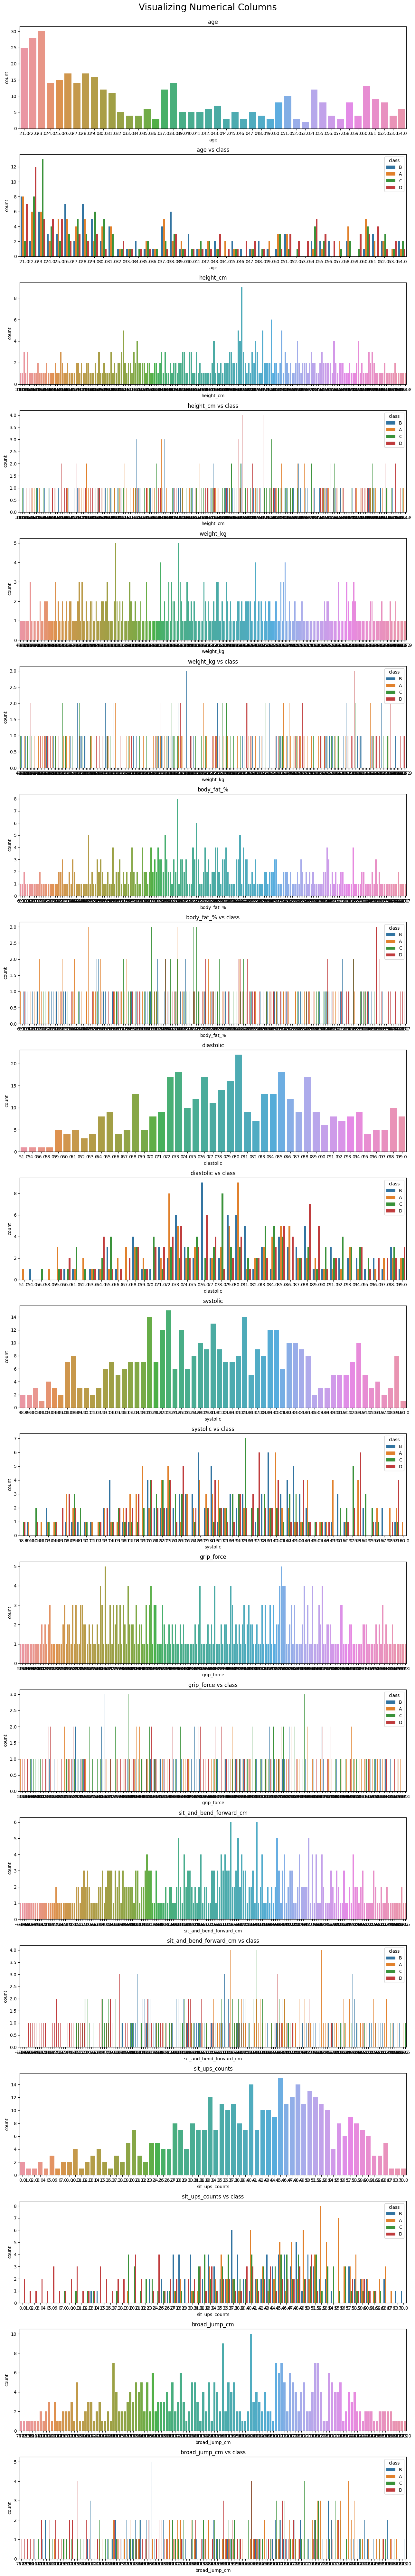

In [ ]:
num_columns = len(numerical)
fig, axs = plt.subplots(2 * num_columns, 1, figsize=(13, num_columns * 8))
plt.suptitle("Visualizing Numerical Columns", fontsize=20, y=0.999)
for index, i in enumerate(numerical):
    sns.countplot(data=df, x=i, ax=axs[index * 2])
    axs[index * 2].set_title(f'{i}')
    sns.countplot(data=df, x=i, ax=axs[index * 2 + 1], hue='class')
    axs[index * 2 + 1].set_title(f'{i} vs class')
fig.tight_layout()

Responden memiliki data yang berbeda-beda.

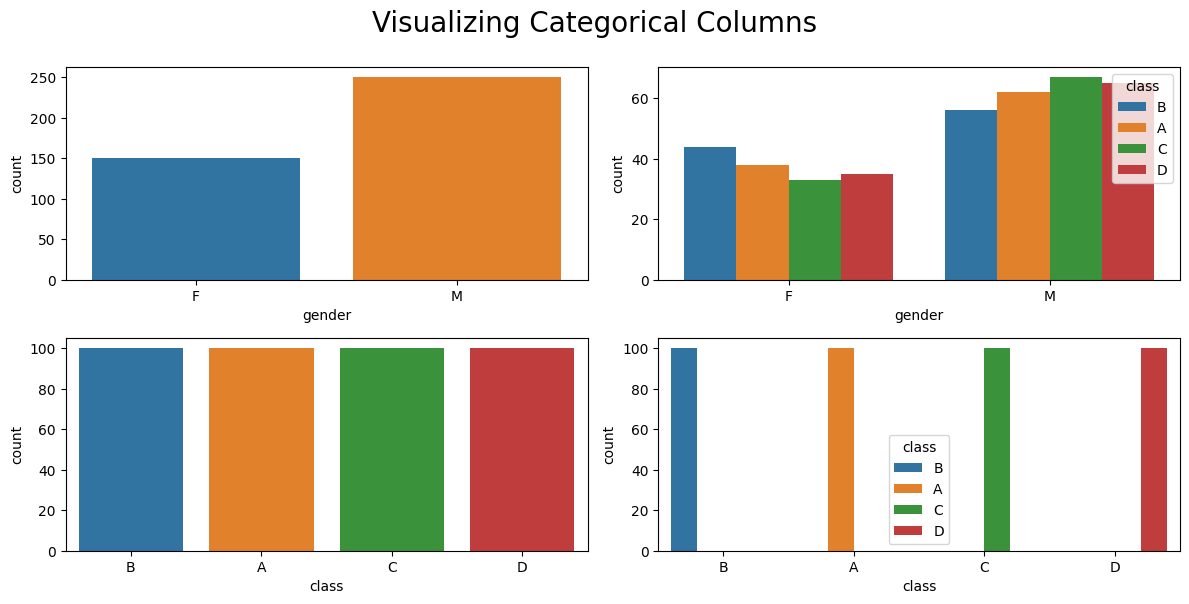

In [ ]:
fig,ax = plt.subplots(2, 2, figsize=(12, 6))
plt.suptitle("Visualizing Categorical Columns", fontsize=20, y=0.999)
for index, i in enumerate(categorical):
    sns.countplot(data=df, x=i, ax=ax[index, 0])
    sns.countplot(data=df, x=i, ax=ax[index, 1], hue='class')
fig.tight_layout()

- Lebih banyak responden pria dibandingkan perempuan. Responden pria paling banyak dikategorikan sebagai kelas C, sementara wanita paling banyak dikategorikan sebagai kelas B.
- Jumlah data pada setiap kelas sama.

### **Correlation**
Correlation atau korelasi adalah suatu ukuran untuk mengukur sejauh mana hubungan linier antara dua variabel. Korelasi dapat menunjukkan apakah suatu variabel memiliki hubungan positif atau negatif dengan variabel lainnya.

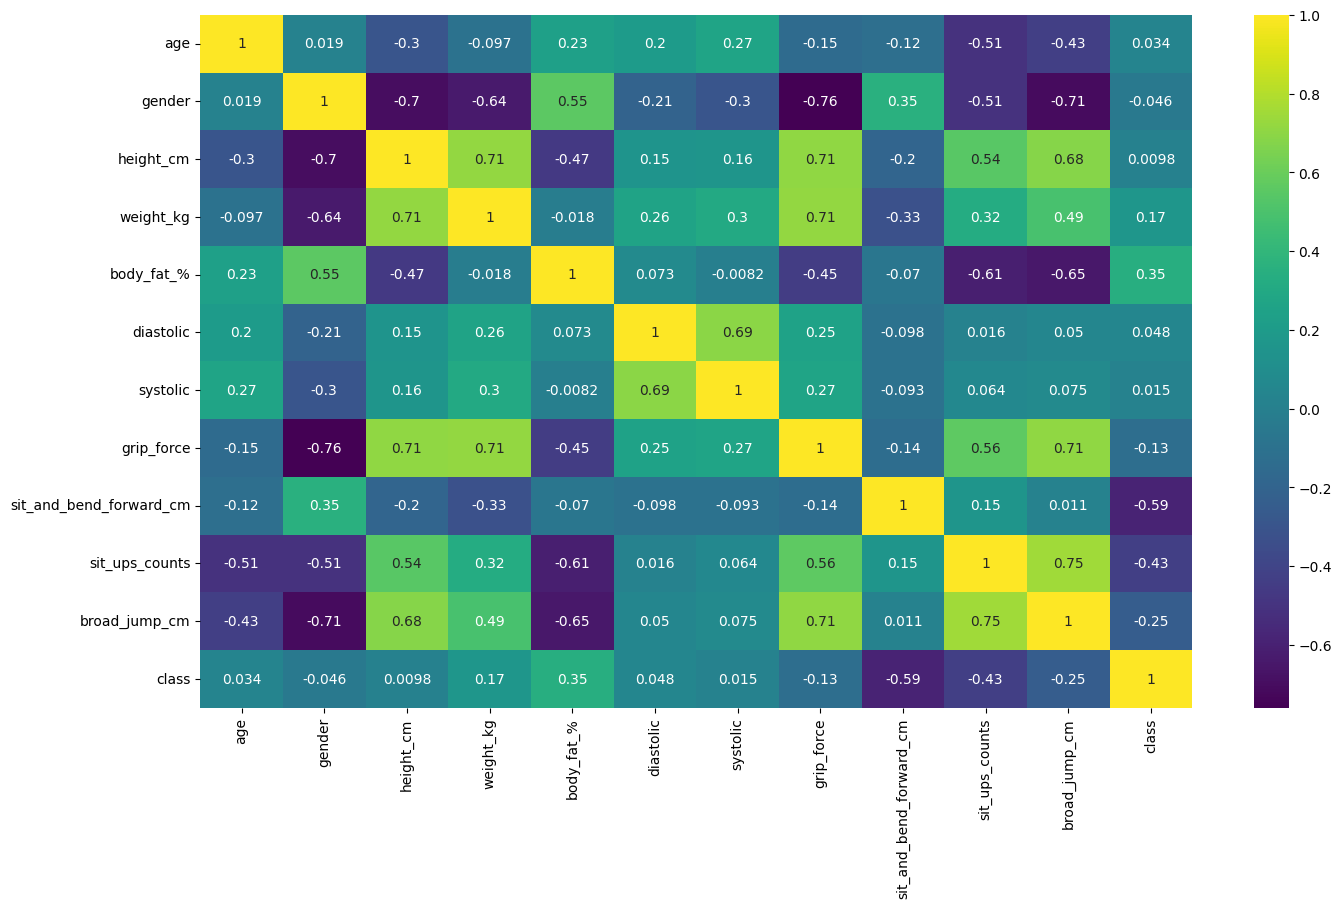

In [ ]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(df_encoding.corr(), annot = True, cmap = 'viridis')
plt.show()

Nilai korelasi berkisar antara -1 hingga 1, dimana nilai -1 menunjukkan hubungan negatif yang sempurna, 0 menunjukkan tidak ada hubungan, dan 1 menunjukkan hubungan positif yang sempurna. Korelasi sering digunakan dalam analisis statistik untuk mengevaluasi hubungan antara dua variabel. Dapat diketahui bahwa fitur yang paling berkorelasi positif dengan class adalah body_fat_%.

## **Distribution**
Distribusi data (data distribution) adalah cara bagaimana data terdistribusi atau tersebar dalam sebuah populasi atau sampel data. Distribusi data dapat dilihat melalui beberapa karakteristik, seperti bentuk kurva, pusat (mean, median, mode), ukuran penyebaran (range, variance, deviasi standar), dan kemencengan (skewness) dari data. Ada beberapa jenis distribusi data, termasuk distribusi normal (normal distribution).

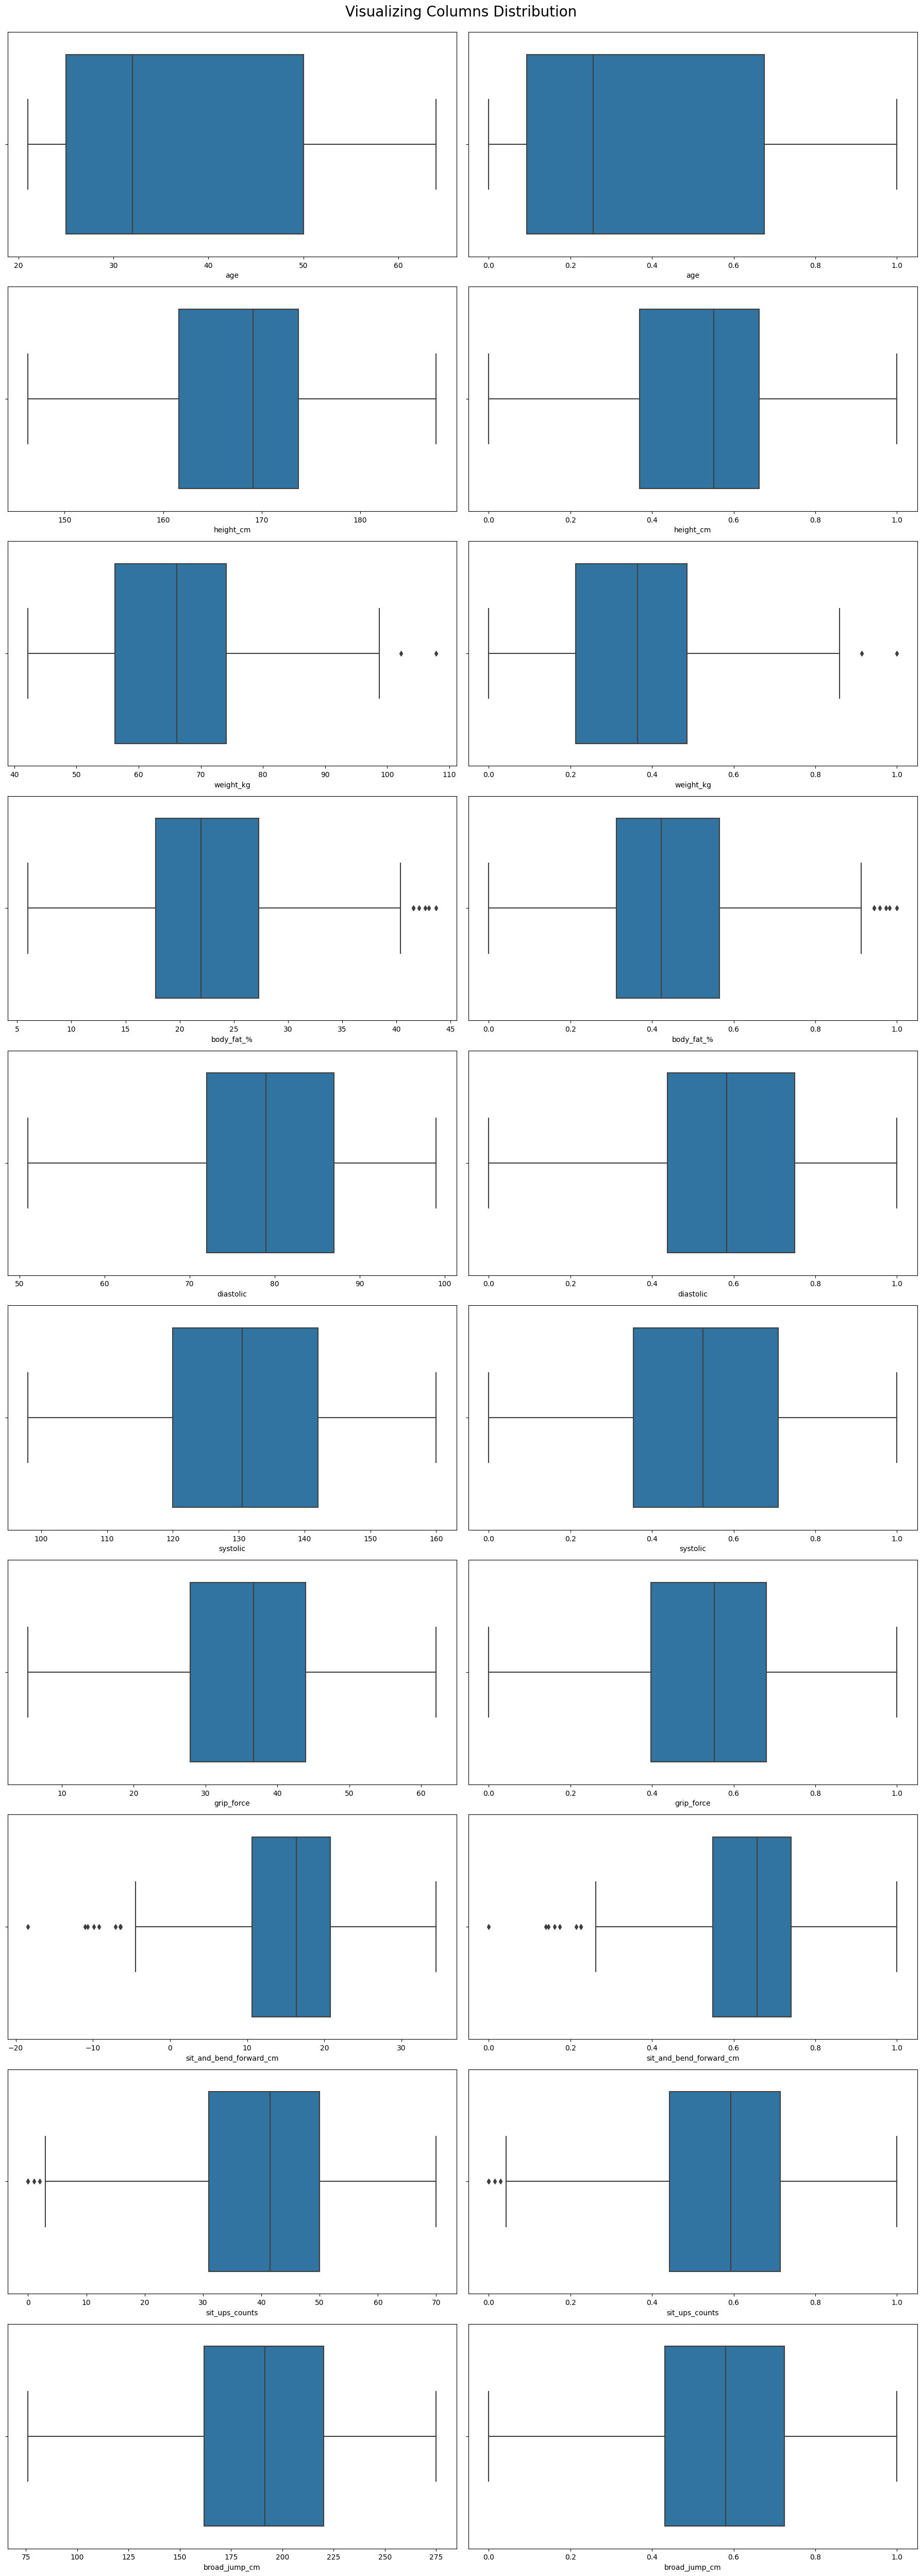

In [ ]:
fig,ax = plt.subplots(10, 2, figsize=(18, 50))
plt.suptitle("Visualizing Columns Distribution", fontsize=20, y=0.999)
for index, i in enumerate(numerical):
    sns.boxplot(data=df, x=i, ax=ax[index, 0])
    sns.boxplot(data=df_norm, x=i, ax=ax[index, 1])
fig.tight_layout()

Setelah dilakukan normalisasi, hasil boxplot sama saja. Hal itu terjadi karena normalisasi tidak mempengaruhi nilai kuartil dan nilai minimum dan maksimum data sehingga tidak mengubah bentuk distribusi data. Namun, normalisasi dapat mempengaruhi skala data, sehingga dapat memudahkan untuk membandingkan distribusi data yang berbeda skala dan menghindari bias.

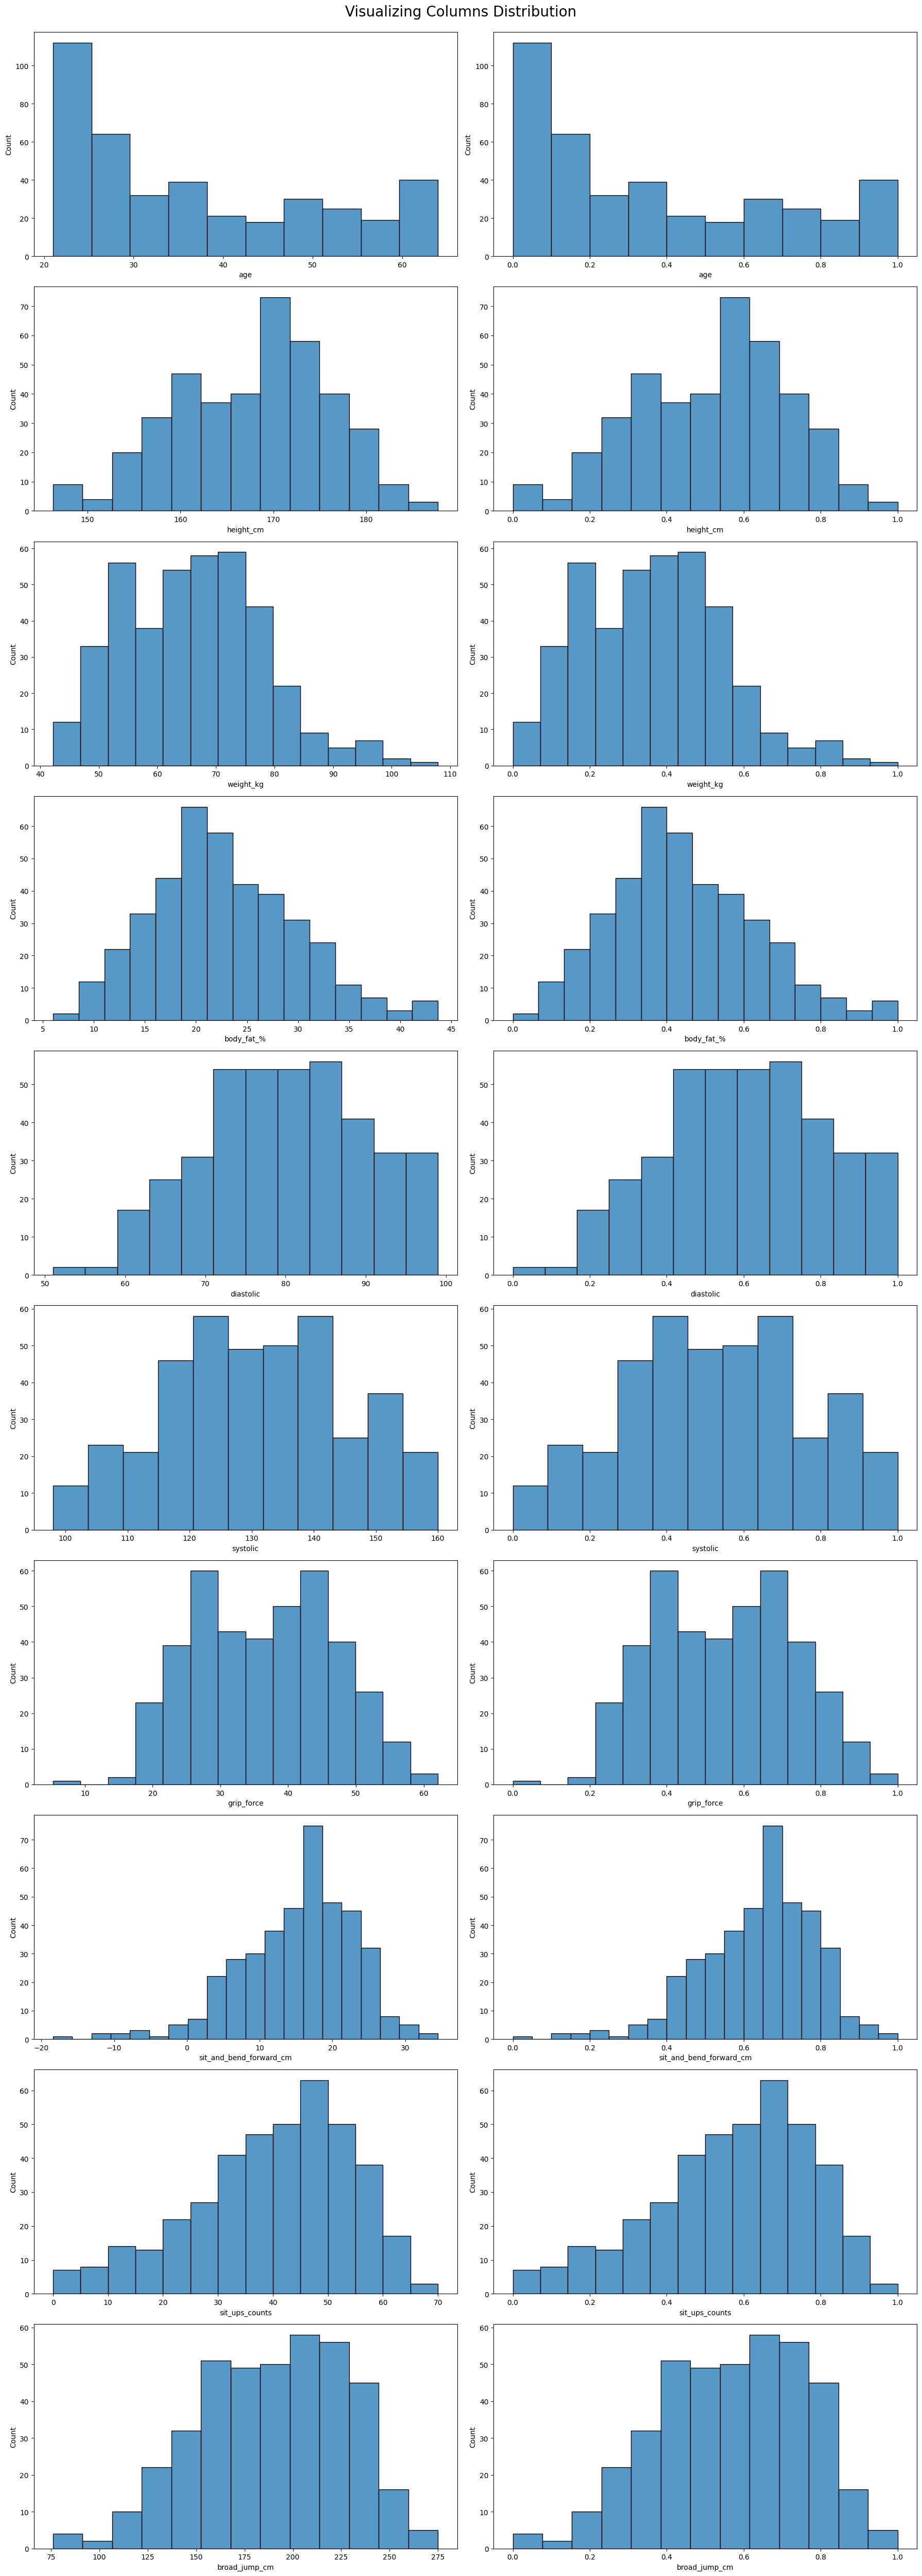

In [ ]:
fig,ax = plt.subplots(10, 2, figsize=(18, 50))
plt.suptitle("Visualizing Columns Distribution", fontsize=20, y=0.999)
for index, i in enumerate(numerical):
    sns.histplot(data=df, x=i, ax=ax[index, 0])
    sns.histplot(data=df_norm, x=i, ax=ax[index, 1])
fig.tight_layout()

Histogram memiliki puncak yang tajam dan sebaran yang sempit. Dalam histogram, distribusi konstan mungkin terlihat sebagai puncak yang tajam atau sebaran yang sangat sempit. Ini menunjukkan bahwa sebagian besar nilai fitur berkumpul di sekitar nilai tertentu.

In [ ]:
# # Distribusi Kurang Baik
# data = np.random.normal(loc=10, scale=1, size=1000)

# plt.hist(data, bins=30, color='blue', edgecolor='black')
# plt.title('Histogram dengan Sebaran Sempit')
# plt.xlabel('Nilai Fitur')
# plt.ylabel('Frekuensi')
# plt.show()

# data = np.random.normal(loc=10, scale=1, size=100)

# plt.boxplot(data, vert=False, widths=0.7, patch_artist=True)
# plt.title('Box Plot dengan Whisker Pendek')
# plt.xlabel('Nilai Fitur')
# plt.show()

# # Distribusi Baik
# data = np.concatenate([np.random.normal(loc=10, scale=1, size=900),
#                        np.random.normal(loc=20, scale=5, size=100),
#                        np.random.normal(loc=30, scale=10, size=10)])

# plt.hist(data, bins=30, color='blue', edgecolor='black')
# plt.title('Histogram dengan Ekor')
# plt.xlabel('Nilai Fitur')
# plt.ylabel('Frekuensi')
# plt.show()

# data = np.concatenate([np.random.normal(loc=5, scale=1, size=50),
#                        np.random.normal(loc=15, scale=1, size=50),
#                        np.array([30, 35, 40, 45, 50])])  # Tambahkan outlier

# plt.boxplot(data, vert=False, widths=0.7, patch_artist=True)
# plt.title('Box Plot dengan Whisker Panjang (Outlier)')
# plt.xlabel('Nilai Fitur')
# plt.show()

Perbedaan distribusi dengan histogram dan box plot.

## **Modelling (Classification)**
Proses modeling adalah suatu tahapan dalam data science atau machine learning yang melibatkan pembuatan model atau algoritma untuk mempelajari pola atau hubungan pada data, sehingga model tersebut dapat digunakan untuk memprediksi nilai atau kelas pada data baru. Klasifikasi pada machine learning adalah kemampuan model untuk mengelompokkan data yang belum diketahui atau belum diamati berdasarkan pola atau hubungan yang dipelajari dari data yang telah diamati sebelumnya.

### **Sigmoid Activation Function and Derivative**
Digunakan untuk mengaktifkan neuron dan menghitung gradien fungsi sigmoid. Beberapa fungsi aktivasi lain seperti tanh, ReLu, Leaky ReLu sudah dicoba tetapi hasil akurasi dari sigmoid masih yang paling baik.

In [ ]:
def sig(X):
  return [1 / (1 + np.exp(-x)) for x in X]

def sigd(X):
  output = []
  for i, x in enumerate(X):
    s = sig([x])[0]
    output.append(s * (1 - s))
  return output

Fungsi sig mengimplementasikan sigmoid activation function, mengubah setiap elemen dalam array X menjadi nilai antara 0 dan 1​. Fungsi sigd menghitung turunan sigmoid untuk setiap elemen dalam array X dengan menggunakan hasil dari fungsi sig, sesuai dengan aturan turunan fungsi sigmoid. Kedua fungsi ini digunakan umumnya dalam konteks jaringan saraf tiruan untuk mengaktifkan neuron dan menghitung gradien selama proses pembelajaran.

### **Backpropagation Training**
Pelatihan dalam konteks pembelajaran mesin adalah proses mengajari model untuk memahami pola dalam data melalui penyesuaian parameter atau bobotnya, biasanya dengan meminimalkan selisih antara prediksi model dan nilai sebenarnya menggunakan metode seperti stochastic gradient descent. Tujuannya adalah untuk meningkatkan kinerja model agar dapat memberikan prediksi yang lebih akurat pada data baru.

In [ ]:
def bp_fit(X, target, layer_conf, max_epoch, max_error=.1, learn_rate=.1, print_per_epoch=100):
  start_time = time.time()

  np.random.seed(1)
  nin = [np.empty(i) for i in layer_conf]
  n = [np.empty(j+1) if i < len(layer_conf) - 1 else np.empty(j) for i, j in enumerate(layer_conf)]
  w = np.array([np.random.rand(layer_conf[i] + 1, layer_conf[i+1]) for i in range(len(layer_conf) - 1)])
  dw = [np.empty((layer_conf[i] + 1, layer_conf[i + 1])) for i in range(len(layer_conf) - 1)]
  d = [np.empty(s) for s in layer_conf[1:]]
  din = [np.empty(s) for s in layer_conf[1:-1]]
  epoch = 0
  mse = 1

  for i in range(0, len(n)-1):
    n[i][-1] = 1

  while (max_epoch == -1 or epoch < max_epoch) and mse > max_error:
    epoch += 1
    mse = 0
    for r in range(len(X)):
      n[0][:-1] = X[r]

      for L in range(1, len(layer_conf)):
        nin[L] = np.dot(n[L-1], w[L-1])
        n[L][:len(nin[L])] = sig(nin[L])

      e = target[r] - n[-1]
      mse += sum(e ** 2)
      d[-1] = e * sigd(nin[-1])
      dw[-1] = learn_rate * d[-1] * n[-2].reshape((-1, 1))

      for L in range(len(layer_conf) - 1, 1, -1):
        din[L-2] = np.dot(d[L-1], np.transpose(w[L-1][:-1]))
        d[L-2] = din[L-2] * np.array(sigd(nin[L-1]))
        dw[L-2] = (learn_rate * d[L-2]) * n[L-2].reshape((-1, 1))

      w += dw
    mse /= len(X)

    if print_per_epoch > -1 and epoch % print_per_epoch == 0:
      print(f'Epoch {epoch}, MSE: {mse}')

  execution = time.time() - start_time
  print("Waktu eksekusi: %s detik" % execution)
  return w, epoch, mse

Fungsi training backpropagation ini melakukan iterasi melalui dataset untuk menyesuaikan bobot jaringan guna meminimalkan mean squared error (MSE) antara prediksi dan target, dengan laju pembelajaran dan maksimum epoch sebagai parameter yang dapat diatur. Hasil pelatihan, termasuk bobot yang diperbarui, jumlah epoch, dan MSE, dicetak setiap print_per_epoch iterasi, dan waktu eksekusi juga diukur dan ditampilkan.

### **Backpropagation Testing**
Pada tahap pengujian dalam pembelajaran mesin, model yang telah dilatih diuji pada dataset terpisah yang belum pernah dilihat sebelumnya untuk mengevaluasi kemampuannya menggeneralisasi dan memberikan prediksi yang akurat pada data baru. Hasil pengujian membantu menentukan sejauh mana model dapat berperforma dengan baik di luar data pelatihan.

In [ ]:
def bp_predict(X, w):
  n = [np.empty(len(i)) for i in w]
  nin = [np.empty(len(i[0])) for i in w]
  predict = []

  n.append(np.empty(len(w[-1][0])))

  for x in X:
    n[0][:-1] = x

    for L in range(0, len(w)):
      nin[L] = np.dot(n[L], w[L])
      n[L + 1][:len(nin[L])] = sig(nin[L])

    predict.append(n[-1].copy())

  return predict

Fungsi testin backpropagation ini mengimplementasikan prediksi output dari jaringan saraf tiruan yang telah dilatih menggunakan metode backpropagation. Dengan memanfaatkan bobot yang telah ditentukan (w), fungsi ini menghitung nilai output untuk setiap input (X) melalui serangkaian perhitungan menggunakan fungsi aktivasi sigmoid dan menyimpan hasil prediksi dalam bentuk vektor. Vektor prediksi kemudian dikumpulkan untuk setiap input dan dihasilkan sebagai output dari fungsi.

### **Cross Validation**
Cross-validation adalah metode evaluasi model statistik yang membagi dataset menjadi subset pelatihan dan pengujian untuk menguji performa model secara objektif, menghindari overfitting, dan memberikan estimasi yang lebih konsisten. Dengan menggunakan teknik ini, model dievaluasi pada beberapa subset data yang berbeda untuk memberikan gambaran yang lebih luas tentang seberapa baik model tersebut dapat digeneralisasi ke data yang belum pernah dilihat sebelumnya.

In [ ]:
# from sklearn.model_selection import KFold

# def cross_validate(X, target, layer_conf, max_epoch, max_error=.1, learn_rate=.1, n_splits=5, print_per_epoch=100):
#     kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)
#     fold = 0
#     total_epochs = 0
#     total_mse = 0
#     total_correct = 0
#     total_samples = 0

#     for train_index, test_index in kf.split(X):
#         fold += 1
#         X_train, X_test = X[train_index], X[test_index]
#         y_train, y_test = target[train_index], target[test_index]

#         w, epochs, mse = bp_fit(X_train, y_train, layer_conf, max_epoch, max_error, learn_rate, print_per_epoch)

#         mse_test = 0
#         correct = 0
#         samples = len(X_test)

#         for r in range(samples):
#             n = [np.empty(j + 1) if i < len(layer_conf) - 1 else np.empty(j) for i, j in enumerate(layer_conf)]
#             for i in range(0, len(n) - 1):
#                 n[i][-1] = 1

#             n[0][:-1] = X_test[r]

#             for L in range(1, len(layer_conf)):
#                 nin = np.dot(n[L - 1], w[L - 1])
#                 n[L][:len(nin)] = sig(nin)

#             e = y_test[r] - n[-1]
#             mse_test += sum(e ** 2)

#             predicted_class = np.argmax(n[-1])
#             true_class = np.argmax(y_test[r])
#             if predicted_class == true_class:
#                 correct += 1

#         accuracy = correct / samples
#         mse_test /= samples
#         total_epochs += epochs
#         total_mse += mse_test
#         total_correct += correct
#         total_samples += samples

#         print(f'Fold {fold}, Test MSE: {mse_test}, Accuracy: {accuracy}')

#     avg_epochs = total_epochs / n_splits
#     avg_mse = total_mse / n_splits
#     avg_accuracy = total_correct / total_samples
#     print(f'Average Epochs: {avg_epochs}, Average Test MSE: {avg_mse}, Average Accuracy: {avg_accuracy}')

# cross_validate(X_train, y_train, layer_conf=[11, 8, 4], max_epoch=150, max_error=0.01, learn_rate=0.2, n_splits=5, print_per_epoch=25)

Nilai akurasi masih tergolong rendah

### **Tuning Hyperparameter**
Melakukan tuning hyperparameter dengan menggunakan algoritma grid search.

In [ ]:
# def grid_search(X_train, y_train, X_val, y_val, layer_conf, learning_rates, max_epochs, max_errors, print_per_epoch=50):
#     best_accuracy = 0
#     best_params = None

#     for learn_rate in learning_rates:
#         for max_epoch in max_epochs:
#             for max_error in max_errors:
#                 w, _, _ = bp_fit(X_train, y_train, layer_conf, max_epoch, max_error, learn_rate, print_per_epoch)
#                 predict = bp_predict(X_val, w)
#                 predict = onehot_dec(predict)
#                 y_test = onehot_dec(y_val)
#                 accuracy = accuracy_score(y_test, predict)

#                 if accuracy > best_accuracy:
#                     best_accuracy = accuracy
#                     best_params = {
#                         'learning_rate': learn_rate,
#                         'max_epoch': max_epoch,
#                         'max_error': max_error
#                     }

#                 print(f'Learning Rate: {learn_rate}, Max Epoch: {max_epoch}, Max Error: {max_error}, Accuracy: {accuracy}')

#     return best_params, best_accuracy

# best_params, best_accuracy = grid_search(X_train, y_train, X_test, y_test, layer_conf=[11, 8, 4], learning_rates=[0.3, 0.5], max_epochs=[100, 150], max_errors=[0.01, 0.1])

# print(f'Best Parameters: {best_params}')
# print(f'Best Accuracy: {best_accuracy}')

Didapatkan hyperparameter terbaik, yaitu layer_conf=(11, 8, 4), learn_rate=.5, max_epoch=150, max_error=.01, print_per_epoch=25.

### **Result**
Hasil akan didapatkan melalui proses training dan testing.

In [ ]:
w, ep, mse = bp_fit(X_train, y_train, layer_conf=(11, 8, 4), learn_rate=.5, max_epoch=150, max_error=.01, print_per_epoch=25)
print(f'Epochs: {ep}, MSE: {mse}')

predict = bp_predict(X_test, w)

Epoch 25, MSE: 0.5802182180209974
Epoch 50, MSE: 0.5380085713281406
Epoch 75, MSE: 0.521050292536936
Epoch 100, MSE: 0.5067805862237178
Epoch 125, MSE: 0.4945266133964085
Epoch 150, MSE: 0.4842944714120726
Waktu eksekusi: 4.624996900558472 detik
Epochs: 150, MSE: 0.4842944714120726


Didapatkan MSE terakhir, yaitu 0.4842944714120726.

## **Evaluation**
Evaluation dalam data science adalah proses mengevaluasi hasil dari seluruh tahap yang telah dilakukan sebelumnya. Proses ini mencakup mengukur akurasi dari model yang telah dibuat dan mengevaluasi kinerja model. Proses ini juga bertujuan untuk mengidentifikasi kemungkinan kegagalan atau masalah yang mungkin terjadi dan mengidentifikasi cara yang lebih baik untuk meningkatkan model.

### **Accuracy**
Accuracy score adalah metrik evaluasi yang mengukur proporsi prediksi yang benar dari keseluruhan prediksi model pembelajaran mesin. Dinyatakan dalam persentase, semakin tinggi accuracy score, semakin baik model dapat memprediksi dengan benar pada dataset yang diberikan.

In [ ]:
predict = onehot_dec(predict)
y_test = onehot_dec(y_test)
accuracy = accuracy_score(predict, y_test)

print('Output:', predict)
print('True :', y_test)
print('Accuracy:', accuracy)

Output: [1, 3, 3, 2, 2, 0, 0, 2, 3, 1, 3, 0, 2, 0, 2, 2, 3, 1, 3, 0, 2, 2, 2, 2, 1, 1, 0, 3, 0, 1, 0, 3, 3, 1, 2, 0, 2, 2, 0, 3, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1, 0, 1, 0, 3, 2, 3, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 3, 0, 3, 3]
True : [2, 3, 3, 0, 1, 0, 2, 2, 3, 1, 3, 2, 3, 0, 3, 0, 3, 2, 3, 0, 3, 3, 2, 3, 1, 1, 1, 3, 0, 0, 0, 2, 3, 2, 3, 0, 2, 2, 0, 3, 2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 1, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 1, 1, 1, 3, 0, 3, 3]
Accuracy: 0.625


Akurasi terbaik yang didapatkan adalah 0.625.

### **Classification Report**
Classification report adalah laporan evaluasi klasifikasi yang menyediakan metrik presisi, recall, dan f1-score untuk setiap kelas dalam model pembelajaran mesin. Laporan ini membantu menganalisis kinerja model pada berbagai kelas dan memberikan informasi rinci tentang keakuratan serta performa model dalam memprediksi kelas-kelas tertentu.

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72        24
           1       0.54      0.41      0.47        17
           2       0.50      0.55      0.52        20
           3       0.81      0.68      0.74        19

    accuracy                           0.62        80
   macro avg       0.63      0.61      0.61        80
weighted avg       0.63      0.62      0.62        80



Paling sulit menebak class tengah 1 dan 2, yaitu B dan C.

### **Comparison With Another Algorithm**
Membandingkan akurasi dengan algoritma XGBoost. XGBoost dianggap sebagai algoritma terbaik karena menggabungkan performa tinggi, mekanisme regularisasi kuat untuk mengatasi overfitting, dan kemampuan penanganan data yang kompleks, outliers, dan nilai yang hilang, membuatnya efektif dan umumnya superior dalam berbagai jenis masalah machine learning. Keunggulan tambahan termasuk fleksibilitas, skalabilitas pada dataset besar, dan dukungan terus-menerus dari komunitas machine learning. Meskipun demikian, pemilihan "algoritma terbaik" tergantung pada karakteristik spesifik dataset dan tujuan pemodelan.

In [ ]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV

# xgb_model = XGBClassifier()

# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [0, 3, 4, 5],
#     'n_estimators': [50, 100, 200],
# }

# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# grid_search.fit(X_train, y_train)

# print("Parameter Terbaik:", grid_search.best_params_)
# print("Skor Terbaik:", -grid_search.best_score_)

Mendapatkan parameter terbaik, yaitu learning_rate=0.01, max_depth=3, n_estimators=200.

In [ ]:
# from xgboost import XGBClassifier

# model = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=200)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# y_pred = onehot_dec(y_pred)
# y_test = onehot_dec(y_test)
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f'Accuracy: {accuracy}')
# print('Classification Report:\n', report)

Hasil dari parameter terbaik dan masih mendapatkan akurasi sebesar 0.525.

## **Conclusion**
Hasil akurasi yang diperoleh tidak terlalu tinggi tapi sudah melebihi 50%. Walaupun telah dilakukan preprocessing, perbaikan model, dan tuning hyperparameter, nilai akurasi tidak bisa berhasil naik. Hal tersebut terjadi bukan karena faktor model, tetapi faktor data sebagai berikut.
1. Jumlah Data dan Dimensi Fitur
Dengan hanya 400 baris dan 11 fitur, ukuran dataset bisa dianggap kecil, terutama jika model yang digunakan cukup kompleks, seperti neural network sehingga model kesulitan untuk mempelajari pola dengan baik.
2. Kurangnya Representasi
Data mungkin tidak mencakup variasi yang cukup. Kurangnya variasi atau representasi yang terbatas dari kelas atau kondisi tertentu dapat membuat model sulit untuk mempelajari dengan baik.
> - Dalam histogram, distribusi konstan mungkin terlihat sebagai puncak yang tajam atau sebaran yang sangat sempit. Ini menunjukkan bahwa sebagian besar nilai fitur berkumpul di sekitar nilai tertentu.
> - Box plot yang memiliki whisker yang pendek atau tidak ada outlier menunjukkan bahwa nilai-nilai fitur memiliki variasi yang sangat terbatas. Whisker panjang menandakan variasi yang lebih besar.
